IMDb movies Dataset

Research Questions

What kind of movies are liked by the audience? 
Which factors are involved in the IMDb score of a movie ?
Are the genres with high IMDb scores highly profited too?

You can find the dataset here : https://drive.google.com/drive/folders/1N3u6K0tNsq2VbfoL3BSYDqfFJTjM0223

In [1]:
import numpy as np
import pandas as pd
from pandas import Series , DataFrame
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import matplotlib.style as style
%matplotlib inline
import seaborn as sns

Understanding the dataset and Data wrangling

In [2]:
movies_df = pd.read_csv('../data/movie_metadata.csv')
movies_df.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [3]:
movies_df.columns,movies_df.shape

(Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
        'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
        'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
        'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
        'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
        'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
        'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
        'imdb_score', 'aspect_ratio', 'movie_facebook_likes'],
       dtype='object'), (5043, 28))

In [4]:
movies_df.isnull().sum()

color                         19
director_name                104
num_critic_for_reviews        50
duration                      15
director_facebook_likes      104
actor_3_facebook_likes        23
actor_2_name                  13
actor_1_facebook_likes         7
gross                        884
genres                         0
actor_1_name                   7
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                  23
facenumber_in_poster          13
plot_keywords                153
movie_imdb_link                0
num_user_for_reviews          21
language                      12
country                        5
content_rating               303
budget                       492
title_year                   108
actor_2_facebook_likes        13
imdb_score                     0
aspect_ratio                 329
movie_facebook_likes           0
dtype: int64

In [5]:
#removing unnecessary columns 
del movies_df['color']
del movies_df['movie_imdb_link']

#dropping the samples that have zero/NaN values
movies_df.dropna(inplace=True)

In [6]:
#The highest number of missing values is seen for budget and gross. 
#This impacts the profit analysis of the movies and we may get inappropriate results.Hence it would be best to remove those rows.
# Checking for an zero values in the budget and revenue columns
print("Rows With Zero Values In The Budget Column:",movies_df[(movies_df['budget']=='NaN')].shape[0])
print("Rows With Zero Values In The Revenue Column:",movies_df[(movies_df['gross']=='NaN')].shape[0])

Rows With Zero Values In The Budget Column: 0
Rows With Zero Values In The Revenue Column: 0


c:\users\gurur\appdata\local\programs\python\python37\lib\site-packages\pandas\core\ops\array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


In [7]:
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3757 entries, 0 to 5042
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   director_name              3757 non-null   object 
 1   num_critic_for_reviews     3757 non-null   float64
 2   duration                   3757 non-null   float64
 3   director_facebook_likes    3757 non-null   float64
 4   actor_3_facebook_likes     3757 non-null   float64
 5   actor_2_name               3757 non-null   object 
 6   actor_1_facebook_likes     3757 non-null   float64
 7   gross                      3757 non-null   float64
 8   genres                     3757 non-null   object 
 9   actor_1_name               3757 non-null   object 
 10  movie_title                3757 non-null   object 
 11  num_voted_users            3757 non-null   int64  
 12  cast_total_facebook_likes  3757 non-null   int64  
 13  actor_3_name               3757 non-null   objec

In [8]:
movies_df.describe()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
count,3757.000000,3757.000000,3757.000000,3757.000000,3757.000000,3.757000e+03,3.757000e+03,3757.000000,3757.000000,3757.000000,3.757000e+03,3757.000000,3757.000000,3757.000000,3757.000000,3757.000000
mean,167.348682,110.256322,807.137876,771.194304,7749.534735,5.259918e+07,1.057994e+05,11524.680596,1.376896,336.759382,4.622614e+07,2002.978706,2021.396061,6.465185,2.111078,9351.339633
std,123.448979,22.643932,3067.787384,1894.004897,15517.667480,7.031348e+07,1.520244e+05,19120.207220,2.041392,411.204705,2.259812e+08,9.887658,4544.362793,1.056123,0.353043,21460.574376
min,2.000000,37.000000,0.000000,0.000000,0.000000,1.620000e+02,9.100000e+01,0.000000,0.000000,4.000000,2.180000e+02,1927.000000,0.000000,1.600000,1.180000,0.000000
25%,77.000000,96.000000,11.000000,194.000000,745.000000,8.243880e+06,1.965500e+04,1920.000000,0.000000,110.000000,1.000000e+07,1999.000000,385.000000,5.900000,1.850000,0.000000
50%,138.000000,106.000000,64.000000,436.000000,1000.000000,3.009311e+07,5.397000e+04,4059.000000,1.000000,210.000000,2.500000e+07,2004.000000,685.000000,6.600000,2.350000,227.000000
75%,224.000000,120.000000,235.000000,691.000000,13000.000000,6.686207e+07,1.285930e+05,16237.000000,2.000000,398.000000,5.000000e+07,2010.000000,976.000000,7.200000,2.350000,11000.000000
max,813.000000,330.000000,23000.000000,23000.000000,640000.000000,7.605058e+08,1.689764e+06,656730.000000,43.000000,5060.000000,1.221550e+10,2016.000000,137000.000000,9.300000,16.000000,349000.000000


Histogram representing all the columns 

array([[<AxesSubplot:title={'center':'actor_1_facebook_likes'}>,
        <AxesSubplot:title={'center':'actor_2_facebook_likes'}>,
        <AxesSubplot:title={'center':'actor_3_facebook_likes'}>,
        <AxesSubplot:title={'center':'aspect_ratio'}>],
       [<AxesSubplot:title={'center':'budget'}>,
        <AxesSubplot:title={'center':'cast_total_facebook_likes'}>,
        <AxesSubplot:title={'center':'director_facebook_likes'}>,
        <AxesSubplot:title={'center':'duration'}>],
       [<AxesSubplot:title={'center':'facenumber_in_poster'}>,
        <AxesSubplot:title={'center':'gross'}>,
        <AxesSubplot:title={'center':'imdb_score'}>,
        <AxesSubplot:title={'center':'movie_facebook_likes'}>],
       [<AxesSubplot:title={'center':'num_critic_for_reviews'}>,
        <AxesSubplot:title={'center':'num_user_for_reviews'}>,
        <AxesSubplot:title={'center':'num_voted_users'}>,
        <AxesSubplot:title={'center':'title_year'}>]], dtype=object)

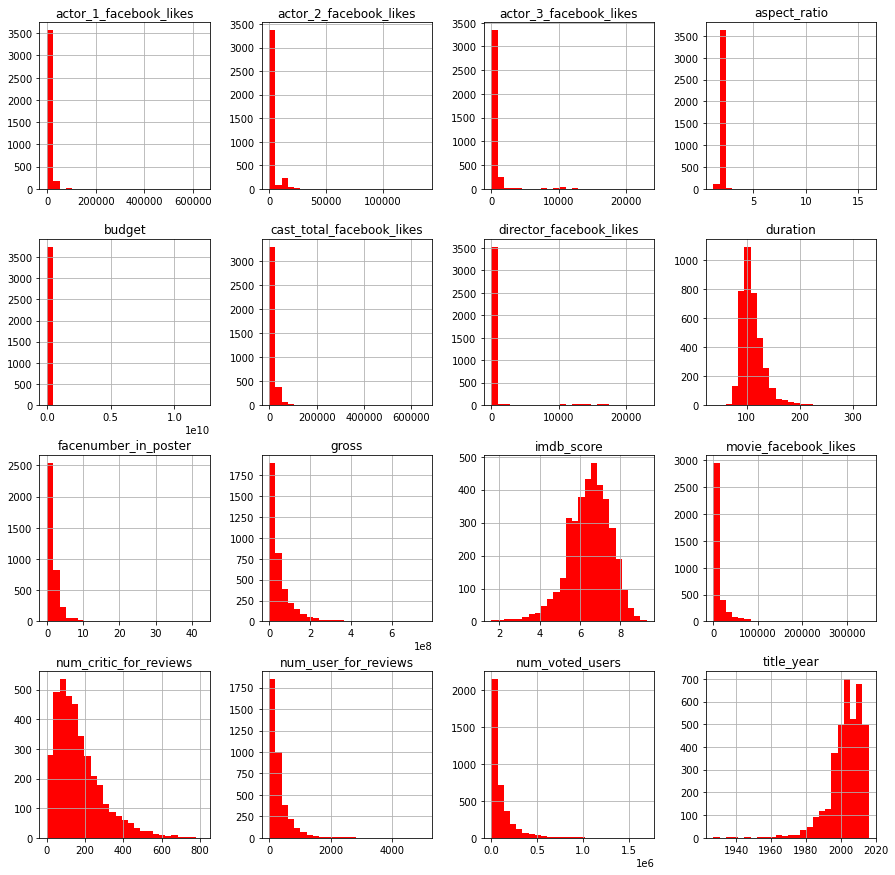

In [9]:
movies_df.hist(bins=25,figsize=(15,15),color='red')

1.How does the whole movie distibution over the years look like ?

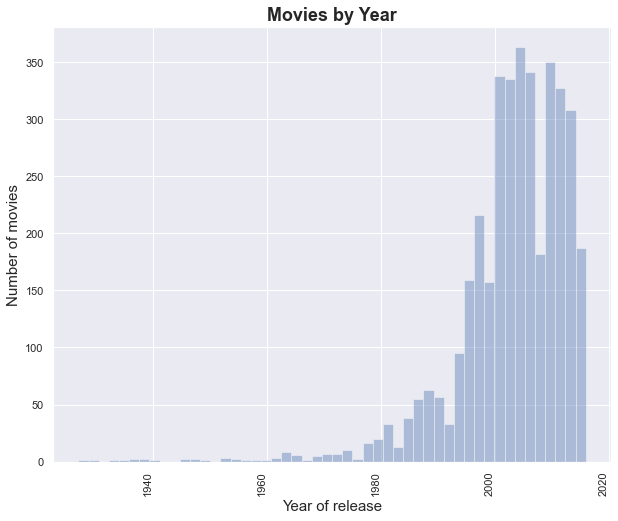

<Figure size 432x288 with 0 Axes>

In [10]:
sns.set(style="darkgrid")

plt.figure(figsize=(10,8))
plt.title('Movies by Year', size=18 , weight = 'bold')
sns.distplot(movies_df.title_year, bins=50,kde=False)
plt.ylabel('Number of movies', size=15)
plt.xlabel('Year of release',size=15)
plt.xticks(rotation=90, ha='right')
plt.show()

plt.savefig("movie_dist.png")

Inference #1 : The dataset has data for movies till 2016 . As we can see there has been a major increase in the movie releases after 2000.But in 2016 , there's a sharp drop in the count.

-------------------------------------------Analysis of Financial Aspects of a movie-------------------------------------------

In [11]:
#As a rule of thumb we calculate using the formula :Profit = Gross - Budget .
#(Revenue earned - total costs involved in the process of making a movie )

movies_df['profit'] = movies_df['gross'] - movies_df['budget']

<AxesSubplot:>

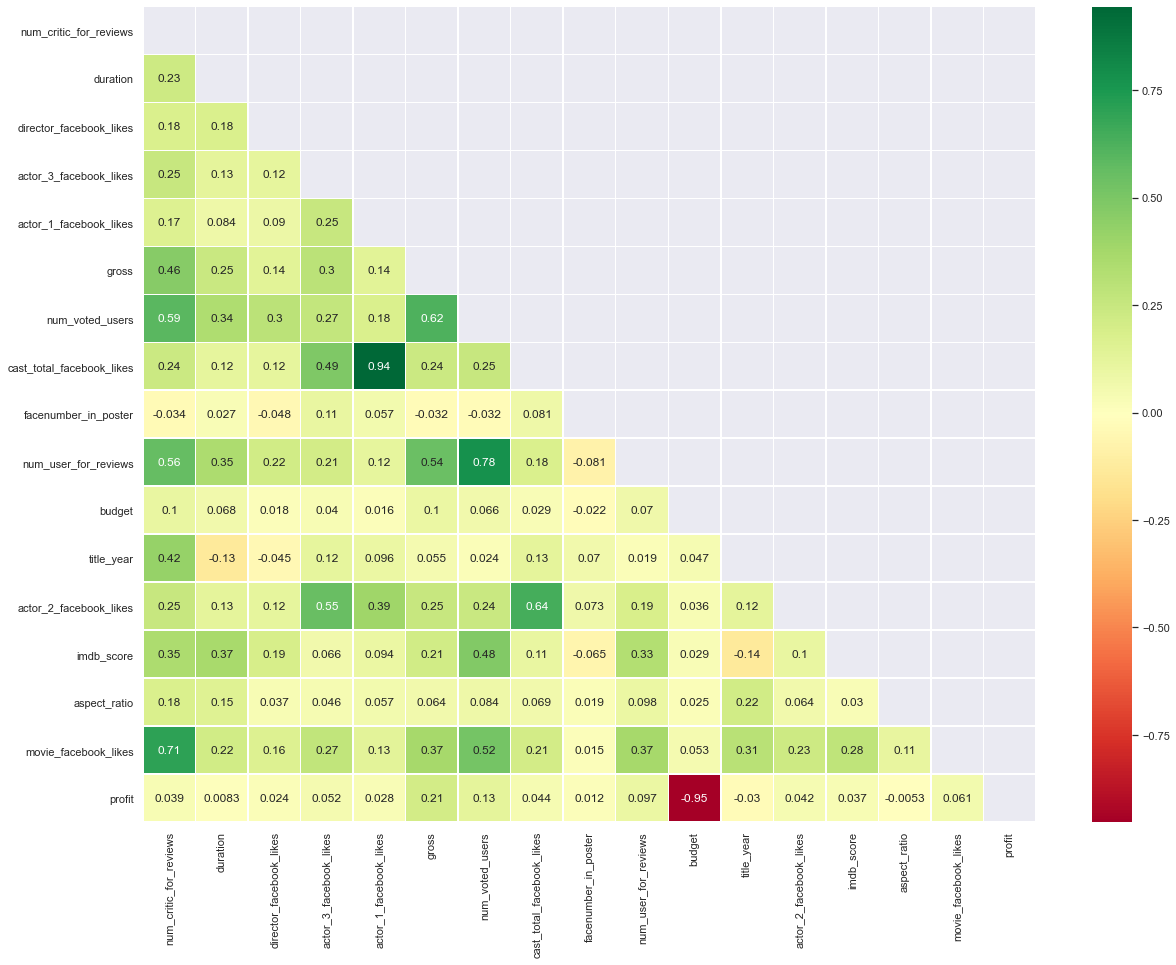

In [12]:
#A bird's eye view on the data using a heatmap which tells the corelation between all the columns in the data.

corr = movies_df.corr()
f,ax = plt.subplots(figsize=(20,15))
mask = np.zeros(corr.shape, dtype=bool)
mask[np.triu_indices(len(mask))] = True
sns.heatmap(corr, annot=True,mask = mask, cmap="RdYlGn", linewidths=.5)

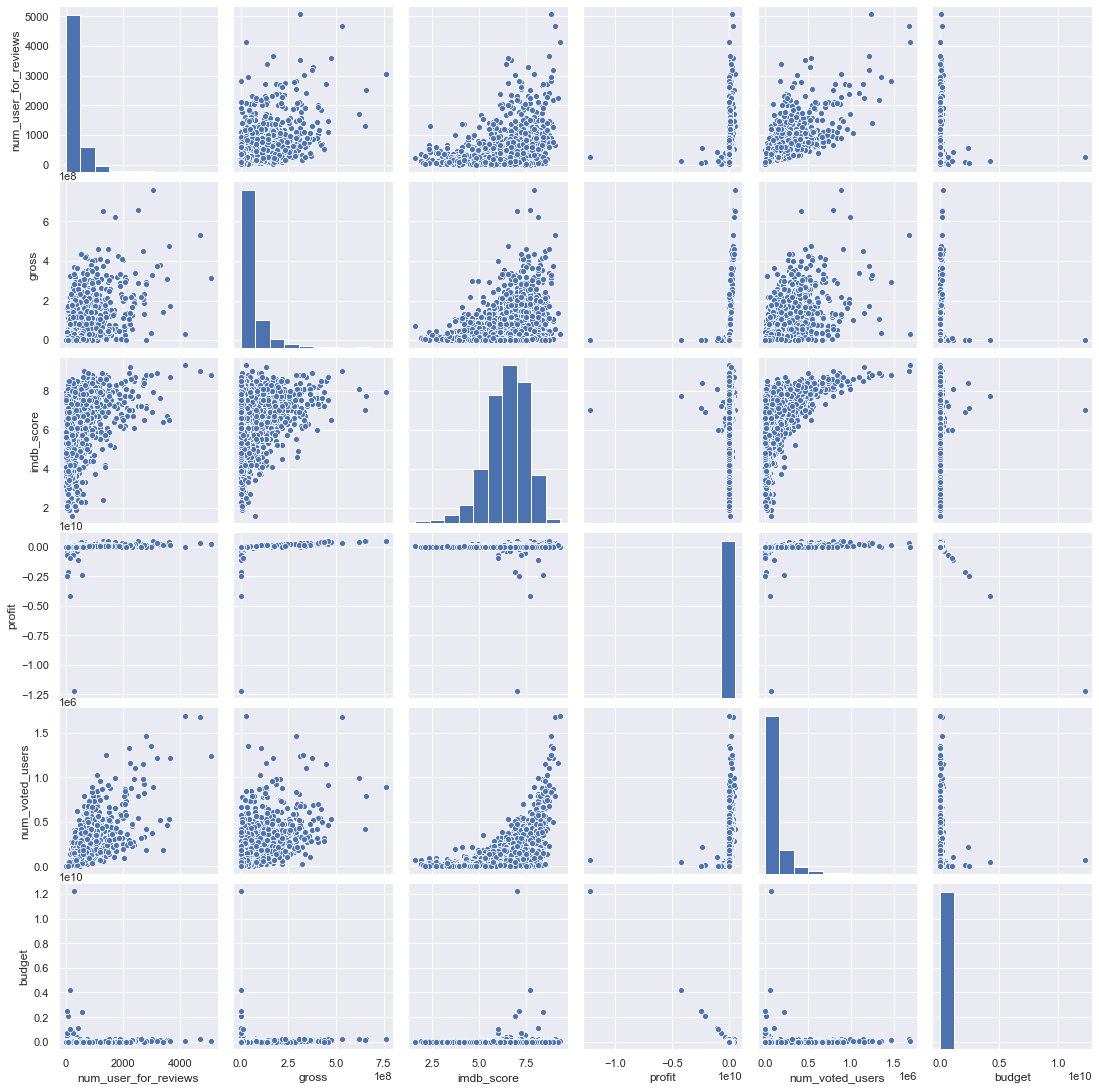

In [13]:
#A glance at a pairplot between the various factors would give a general idea.
g = sns.pairplot(movies_df, vars=["num_user_for_reviews", "gross","imdb_score","profit","num_voted_users","budget"])

plt.savefig("pairplot.png")


Correlation Between Profit And Budget :  -0.9525632837186314


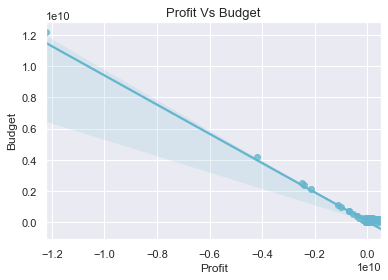

In [14]:

#how does profit change according to their budget.
#make a scatter plot using 'regplot' between 'profit' and 'budget'.
ax = sns.regplot(x=movies_df['profit'], y=movies_df['budget'],color='c')

#setup the title and the labels of the plot.
ax.set_title("Profit Vs Budget",fontsize=13)
ax.set_xlabel("Profit",fontsize=12)
ax.set_ylabel("Budget",fontsize=12)

#setup the figure size and style sheet of the plot.
sns.set(rc={'figure.figsize':(6,4)})
sns.set_style("whitegrid")

#print the correction between them,which was stored in 'data_corr' dataframe earlier.
print("Correlation Between Profit And Budget : ",corr.loc['profit','budget'])

Inference #2: There's a negative correlation between budget and profit, which can be explained by the significant number of missing values in the budget data. The profit is inturn dependent on the budget as well.

How does the IMDb score affect the success factors of a movie?

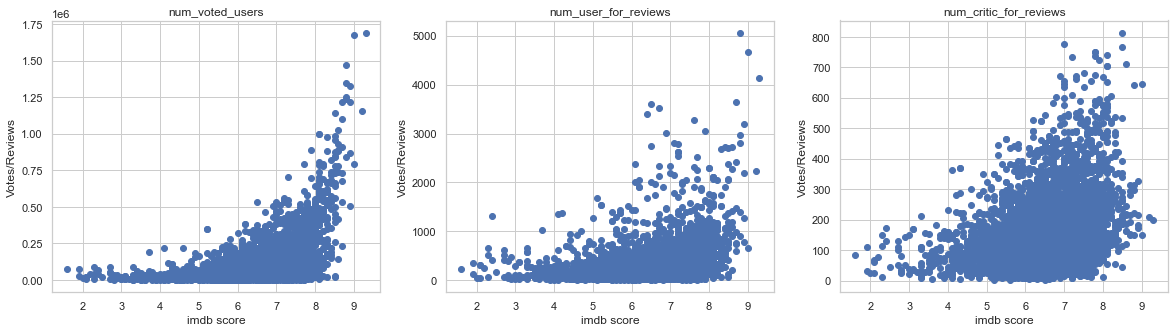

<Figure size 432x288 with 0 Axes>

In [15]:
col=['num_voted_users','num_user_for_reviews','num_critic_for_reviews']

fig, ax = plt.subplots(nrows=1,ncols=3,figsize = (20,5))
x= movies_df['imdb_score']
y= movies_df[['num_voted_users','num_user_for_reviews','num_critic_for_reviews']]

for pos, column in enumerate(col):   # Pick a first col
    plt.sca(ax[pos])
    plt.scatter(movies_df['imdb_score'],movies_df[column])
    plt.title(column)
    plt.xlabel('imdb score')
    plt.ylabel('Votes/Reviews')
plt.show()

plt.savefig("IMDb_score.png")

A majority of the points clustering with an IMDB score above 5 . The sample almost resembles a positive correlation between a film's IMDB score and its box office gross, votes and reviews.

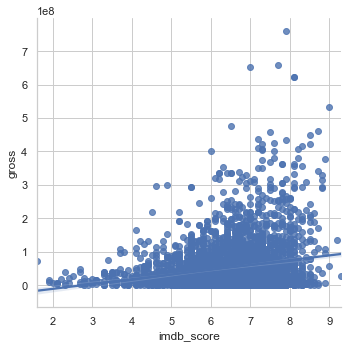

<Figure size 432x288 with 0 Axes>

In [16]:
#Plot relation between Gross and number of user reviews.

sns.lmplot(data=movies_df,x = 'imdb_score', y = 'gross')
plt.show()
plt.savefig("IMDb_vs_gross.png")

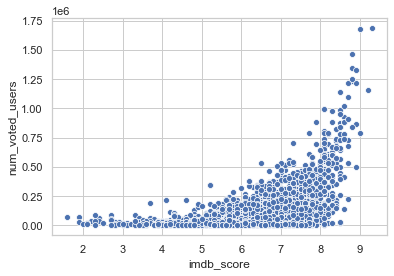

<Figure size 432x288 with 0 Axes>

In [17]:

sns.scatterplot(data=movies_df,x = 'imdb_score', y = 'num_voted_users')
plt.show()
plt.savefig("IMDb_vs_Votes.png")

So ,Which are the most popular movies you think ?

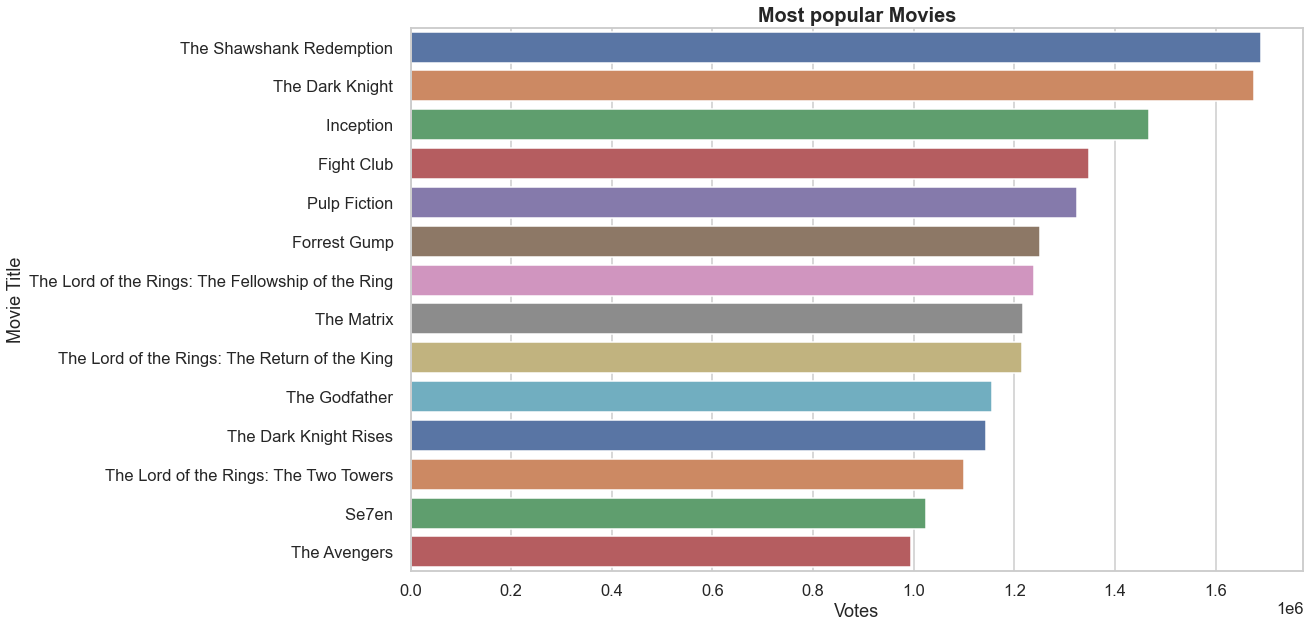

In [18]:
movies_df = movies_df.sort_values('num_voted_users', ascending=False)
movies_df

#Plot the movies with highest number of user votes.

plt.figure(figsize=(16,10))
sns.set_context('talk')

ax = sns.barplot(x=movies_df['num_voted_users'].head(15), y=movies_df['movie_title'].head(15), data=movies_df, palette='deep')
plt.title('Most popular Movies', weight='bold',fontsize = 20)
plt.xlabel('Votes',fontsize = 18)
plt.ylabel('Movie Title',fontsize = 18)

plt.savefig('most_popular_movies.png')

In general , the IMDb score is positively corelated to the number of users voted and the number of reviews for the movie. (i.e popularity)
The more the votes and reviews , the higher the score.
IMDb score has a fairly positive correlation with box office gross.

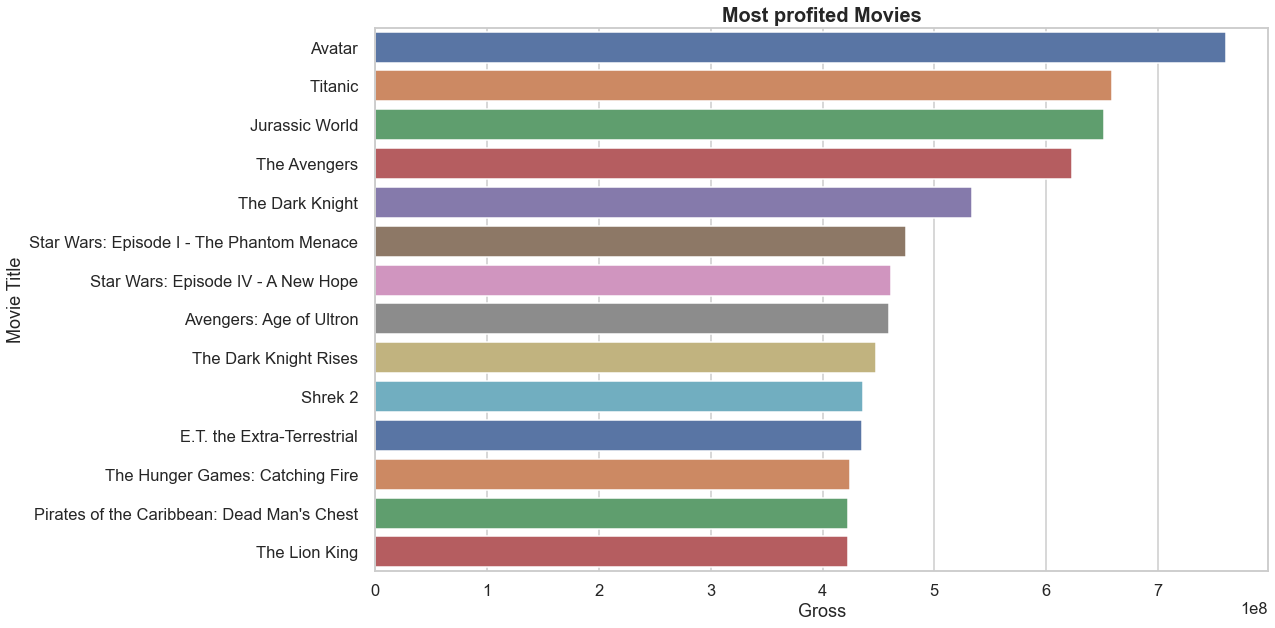

In [19]:
movies_df = movies_df.sort_values('gross', ascending=False)
movies_df

#Plot the movies with highest number of user votes.

plt.figure(figsize=(16,10))
sns.set_context('talk')

ax = sns.barplot(x=movies_df['gross'].head(15), y=movies_df['movie_title'].head(15), data=movies_df, palette='deep')
plt.title('Most profited Movies', weight='bold',fontsize = 20)
plt.xlabel('Gross',fontsize = 18)
plt.ylabel('Movie Title',fontsize = 18)

plt.savefig('most_profited_movies.png')

<AxesSubplot:xlabel='imdb_score'>

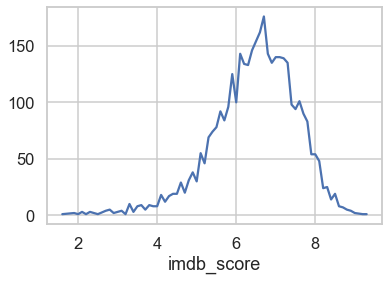

In [20]:
# Do we have really good movies as per the IMDb ratings ?

movies_ratings = movies_df.groupby(['imdb_score'])['movie_title'].count()
movies_ratings.plot()

Inference : More than 200 movies have a good rating > 6

The mean value of IMDb scores as shown : 6.5

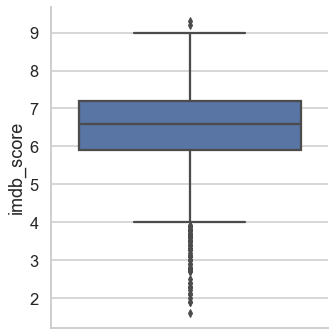

In [21]:
sns.catplot(y='imdb_score',kind='box',data=movies_df)

----------------------------------------------Genre Analysis ------------------------------------------------------------------

The data in the genre column  will be split for further analysis.
Each movie could be tagged to multiple genres , so to analyze the various trends in genres and to find out if there's a correlation between a particular genre and other factors of a movie like duration, budget , revenue , votes, rating etc.

In [22]:
sep_genre = movies_df['genres'].str.split('|').apply(Series, 1).stack() #multiple genres are separated by "|"character for a movie.
sep_genre.index = sep_genre.index.droplevel(-1)
sep_genre.name = 'genres'
del movies_df['genres']
movies = movies_df.join(sep_genre)
movies.head()

,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,actor_1_name,movie_title,...,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,profit,genres
0,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,CCH Pounder,Avatar,...,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000,523505847.0,Action
0,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,CCH Pounder,Avatar,...,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000,523505847.0,Adventure
0,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,CCH Pounder,Avatar,...,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000,523505847.0,Fantasy
0,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,CCH Pounder,Avatar,...,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000,523505847.0,Sci-Fi
1,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Johnny Depp,Pirates of the Caribbean: At World's End,...,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0,9404152.0,Action


In [23]:
#When there are multiple genres for a movie we are considering the first genre as the primary.
#movies_df['main_genre'] = movies_df.genres.apply(lambda x: x.split('|')[0] if '|' in x else x)

In [24]:
len(movies['genres'].unique())

22

In [25]:
movies['title_year'].max()

2016.0

NUmber of movies of different genre types 

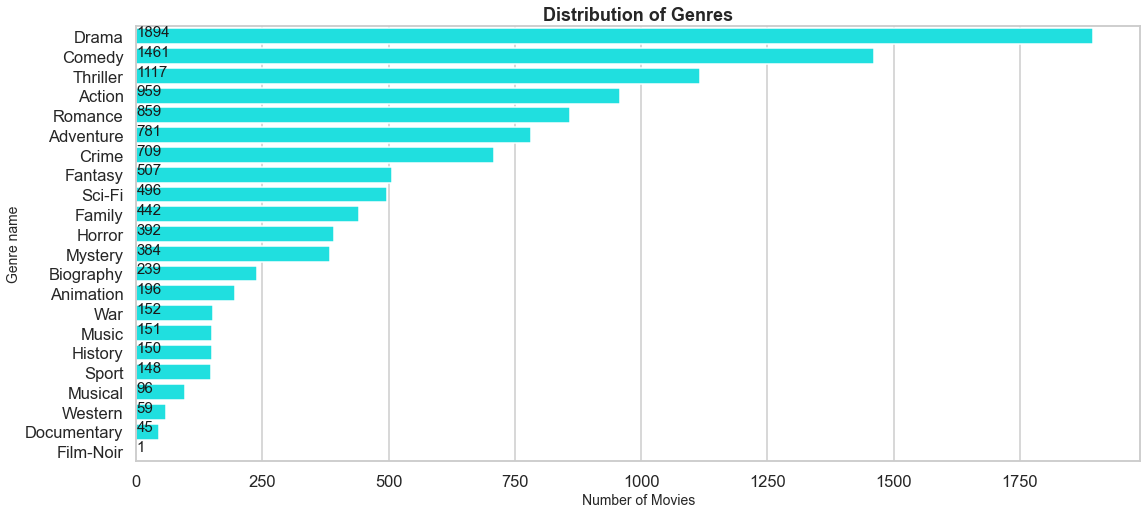

In [26]:
plt.figure(figsize=(18,8))
count = movies['genres'].value_counts()
sns.barplot(count.values, count.index, color = 'cyan')
for i, v in enumerate(count.values):
    plt.text(0.6,i,v,color='k',fontsize=15)
plt.xlabel('Number of Movies', fontsize=14)
plt.ylabel('Genre name', fontsize=14)
plt.title("Distribution of Genres", fontsize=18,weight='bold')

plt.savefig("genre_dist.png")

Majority of the genres released till 2016 fall under the categories Drama , Comedy , Thriller , Action and Romance.

Genres through the years.

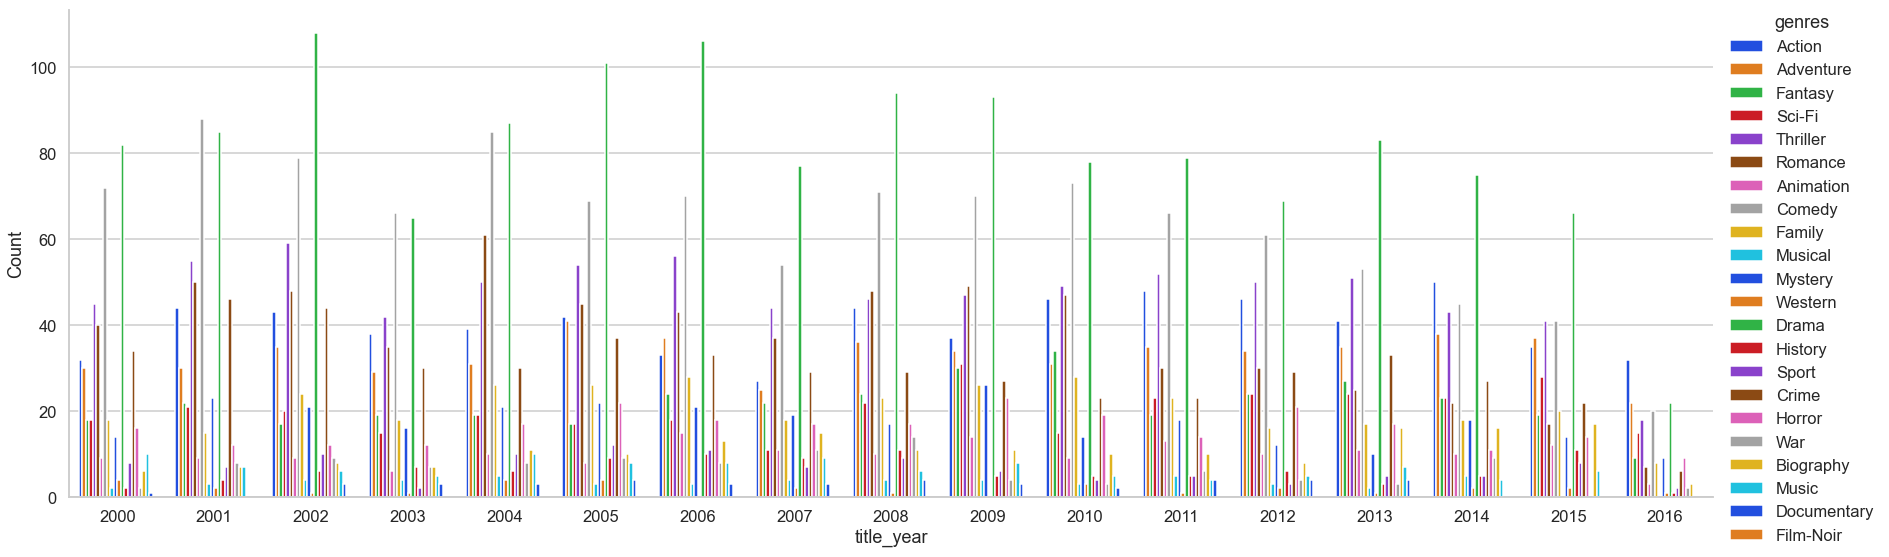

In [27]:
with sns.axes_style('whitegrid'):
    sns.set_context("talk")
    g = sns.catplot("title_year", data=movies, height = 8 ,aspect=3.0, kind='count',palette = 'bright',
                       hue='genres',order=range(2000, 2017))
    g.set_ylabels('Count')
    
plt.savefig("genre_years.png")

Supporting the previous plot ,it can be seen again that a lot of movies produced in the Drama,comedy and thriller genre across the years. 
In 2002 and 2006 we watched a lot of drama movies. 
But there has been a sharp drop in these genres in 2016. While Action movies have managed to remain consistent throughout the years.

What kind of movies have the users liked and voted the most ?

In [28]:
# Sort the number of users voted , group them by genres and store it another dataframe to plot.
movies = movies.sort_values('num_voted_users',ascending = False)
movies.head()
mov2 = pd.DataFrame(movies.groupby('genres').movie_title.nunique())

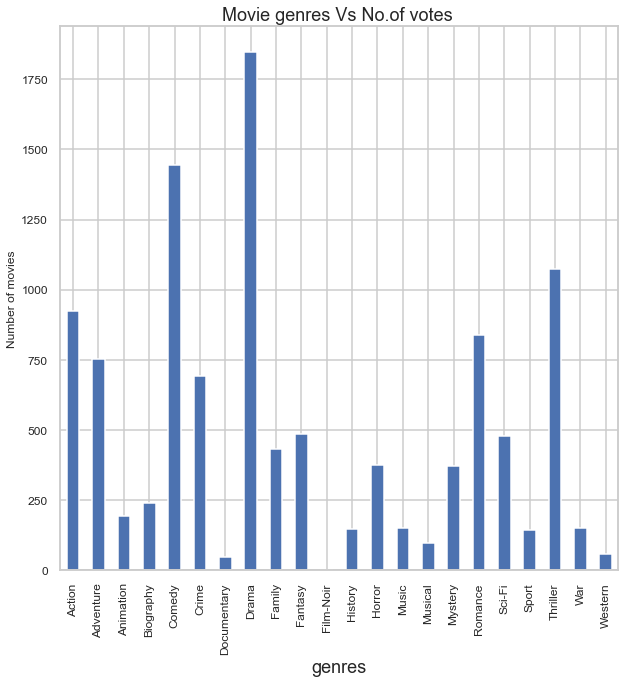

In [29]:
mov2['movie_title'].plot(kind = 'bar', stacked = True,title = "Movie genres Vs No.of votes ",figsize = (10,10),fontsize = 12)
plt.ylabel("Number of movies",fontsize = 12 )
plt.savefig("genre_votes.png")

Along with the already mentioned genres (Drama, Comedy and Action ), Thriller and Adventure movies are also highly voted by the audience.

IMDb rating for different genres

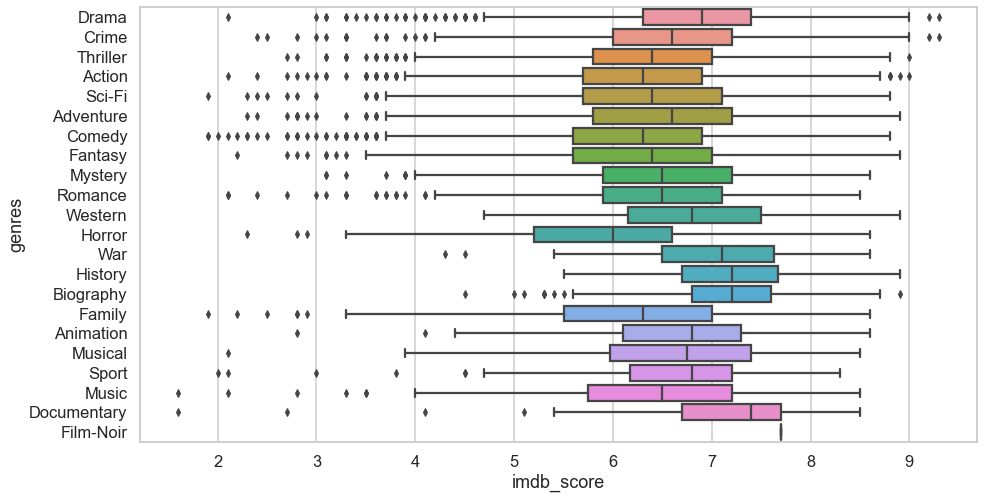

In [30]:
plt.figure(figsize=(15,8))
sns.boxplot(x='imdb_score',y='genres',data=movies)

plt.savefig("boxplot.png")

Documentary movies had the highest rating followed by History, war ,Biography and Western.
Horror genre has received the least ratings.


Average duration per genre

In [31]:
mov3 = movies[['movie_title','genres','duration']]


In [32]:
mov4 = mov3.groupby(['genres']).mean()
mov4['average_duration']  = mov4['duration'].round(2)
del mov4['duration']
mov4.sort_values('average_duration', ascending=False, inplace = True )
mov4.reset_index(inplace = True)
mov4

,genres,average_duration
0,History,138.83
1,War,133.86
2,Western,129.64
3,Biography,125.59
4,Drama,116.36
5,Adventure,113.95
6,Action,113.59
7,Sport,112.70
8,Crime,111.26
9,Mystery,111.03


Average duration of each genre

<AxesSubplot:xlabel='average_duration', ylabel='genres'>

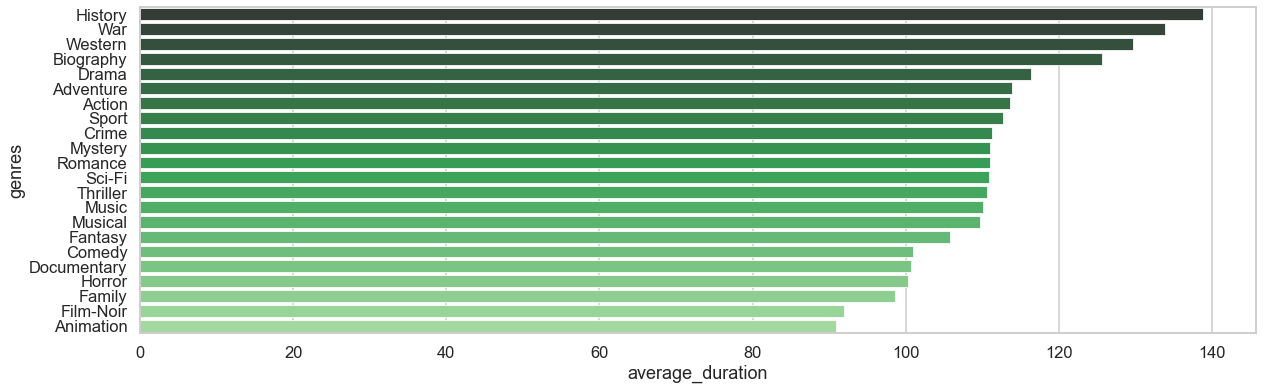

In [33]:
f, ax = plt.subplots(figsize = (20,6))
sns.set_context('paper')
#sns.set_color_codes('pastel')
sns.barplot(x = 'average_duration', y = 'genres',data = mov4,             
            saturation = 5, 
            palette = 'Greens_d',
            errcolor = 'gray', errwidth = 2,  
            ci = 'sd'   
            )

Duration of most of the movies are in the range of 100 - 120 minutes .
The higly voted genres are also approximately of the same duration . 
This shows that people prefer to watch movies which are neither too short nor too long.

Which genres are most profitted ? 

In [34]:
mov5 = movies[['movie_title','profit','genres']]
mov6 = mov5.groupby(['genres']).mean()
mov6['profit_million'] = mov6['profit']/1000000
del mov5['profit']
mov6.sort_values('profit_million', ascending=False, inplace = True )


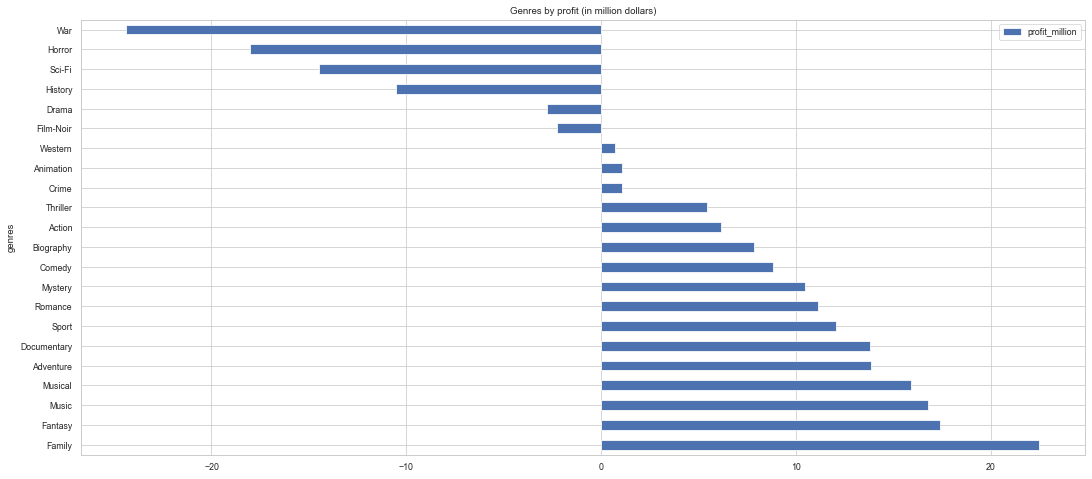

In [35]:
mov6[['profit_million']].plot.barh(stacked=True, title = 'Genres by profit (in million dollars)', figsize=(18, 8));
plt.savefig("profit.png")

As against assumptions , the highest profitted movies are neither Comedy , Drama, Action or Thriller. 
The most highly profited genres are Family and Fantasy . However , Romance and Adventure movies also made it to the list though not in the top 3.
So ,critically acclaimed movies don't necessarily correlate with the highest earning movies.


Which are the keywords mostly used by the audience to watch movies?

In [36]:
key_count = pd.DataFrame(movies['plot_keywords'].value_counts()).reset_index()
key_count.rename(columns = {'index':'keywords'},inplace=True)
key_count

,keywords,plot_keywords
0,alien friendship|alien invasion|australia|flyi...,18
1,assistant|experiment|frankenstein|medical stud...,12
2,animal name in title|ape abducts a woman|goril...,12
3,based on book|blob|ferris wheel|manuscript|mon...,10
4,babysitting|experiment|nightmare|possession|twin,10
...,...,...
3652,catholic|catholicism|rabbi|school|summer,1
3653,blaxploitation|hanukkah|jewish|kwanzaa|santa c...,1
3654,blonde|college|friend|highway travel|road trip,1
3655,40th birthday|aging|birthday|sex|viagra,1


In [37]:
#Similiar to genres , the plot_keywords column in the dataset has multiple keywords separated by "|"
# A function is defined to separate them and store it in a series. The function then returns the frequency of those keywords.

def count_keywords(x):
    #concatenate all the rows of the keywords
    words = key_count[x].str.cat(sep = '|')
    data = pd.Series(words.split('|'))
    #counts each of the keywords and returns it.
    value = data.value_counts(ascending=False)
    return value

#call the function for counting the keywords.
total_keywords_movies = count_keywords('keywords')

#Append the keywords counted to a list.
i = 0
keyword_count = []
for k in total_keywords_movies.index:
    keyword_count.append([k, total_keywords_movies[i]])
    i = i+1


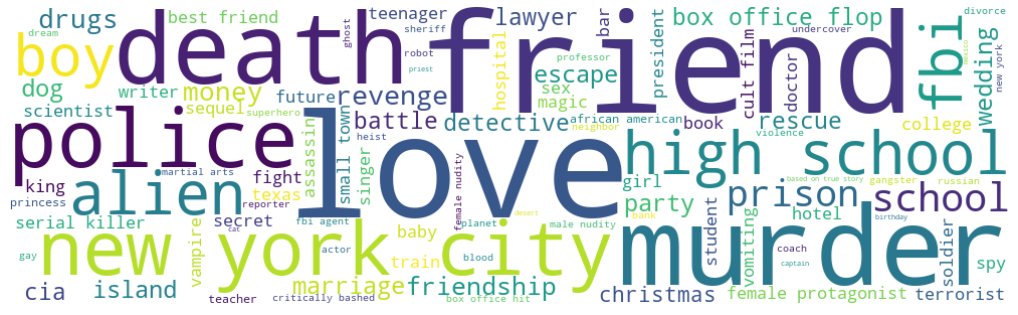

In [38]:

fig = plt.figure(1, figsize=(18,13))
ax1 = fig.add_subplot(2,1,1)

#defining a dictionary used to produce the wordcloud
words = dict()
trunc_occurences = keyword_count[0:100]
for s in trunc_occurences:
    words[s[0]] = s[1]
tone = 55.0 # define the color of the words

# Define Wordcloud frame specifications 
wordcloud = WordCloud(width=1000,height=300, background_color='white', 
                      max_words=1000,relative_scaling=0.5,
                      normalize_plurals=False)
wordcloud.generate_from_frequencies(words)
ax1.imshow(wordcloud, interpolation="bilinear")
ax1.axis('off')

plt.savefig("wordcloud.png")

Conclusion

1.Drama ,Action ,Comedy ,Thriller and Adventure seem to be the all-time favourite genres with high votes and good average rating of above 7.
2.Most of the movies produced and released across these years fall in these genres too.
3.Horror movies were really a bad choice in terms of popularity and revenue.
4.IMDb score talks more about the popularity than the movie’s box office gross A critically well acclaimed movie does not always guarantee high earnings.
